<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [2]:
## Langkah 1
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


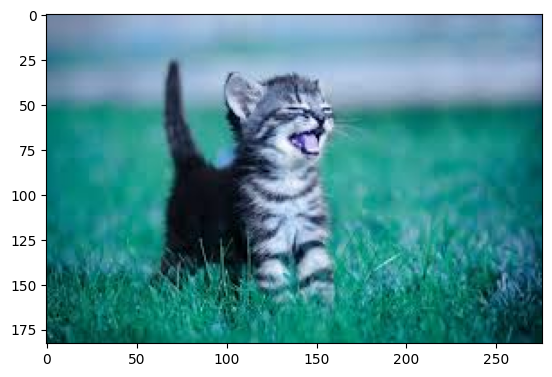

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg')
plt.imshow(img)
# perhatikan hasilnya adalah citra dengan channel warna BGR

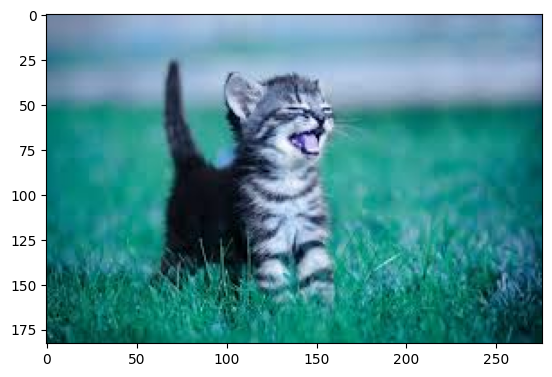

In [8]:
## Langkah 2
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)  #konversi channel BGR -> RGB
plt.imshow(img3)

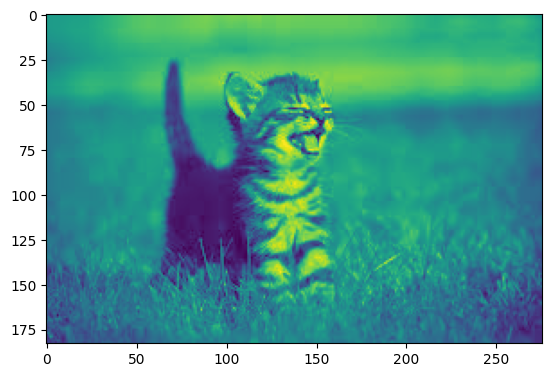

In [9]:
## Langkah 3
im_gray = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(im_gray)

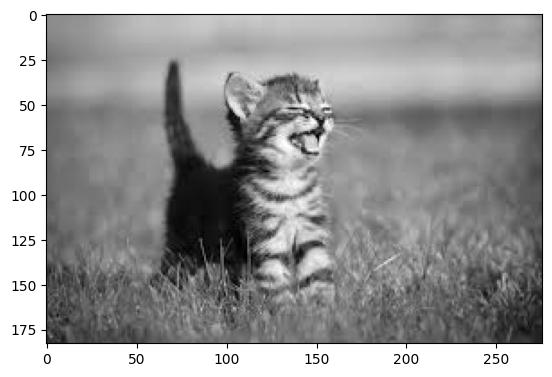

In [10]:
plt.imshow(im_gray, cmap='gray')

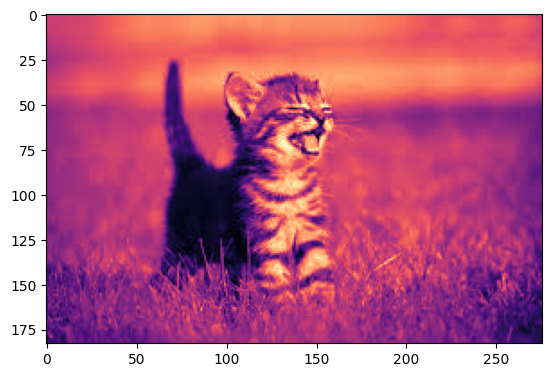

In [13]:
plt.imshow(im_gray, cmap='magma')

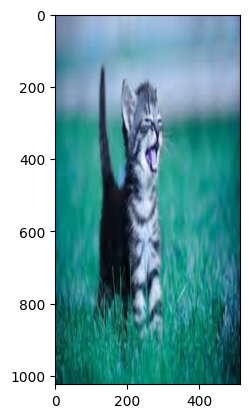

In [14]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

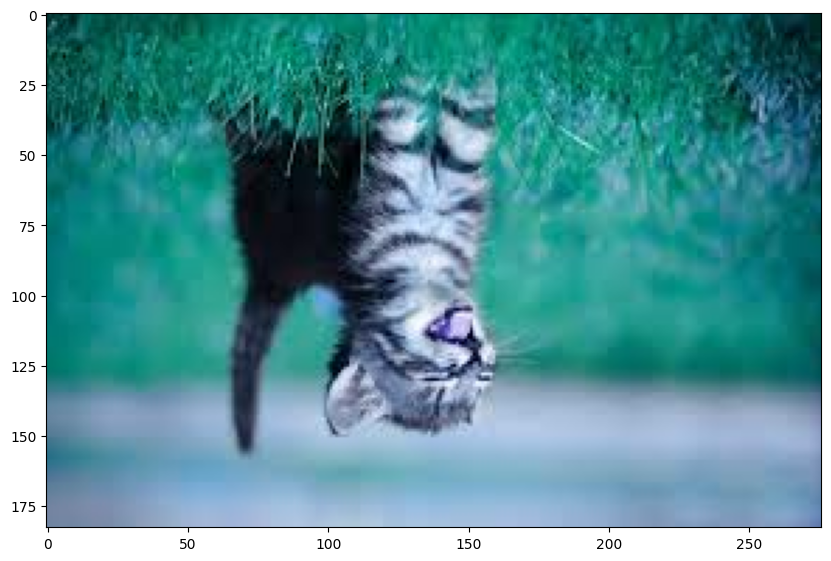

In [15]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

#simpan File image
#cv.imwrite('/content/drive/MyDrive/Image PCVK/kitten01.jpeg', img5)
#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(10, 10))   #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

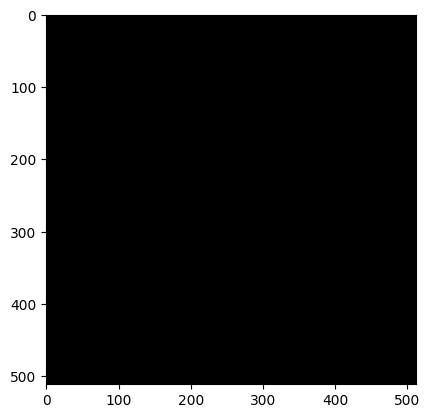

In [16]:
## Langkah 4
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

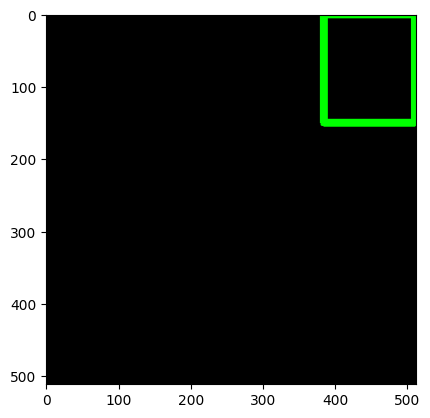

In [17]:
#perhatikan koordinat titik2 pt1 dan pt2
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

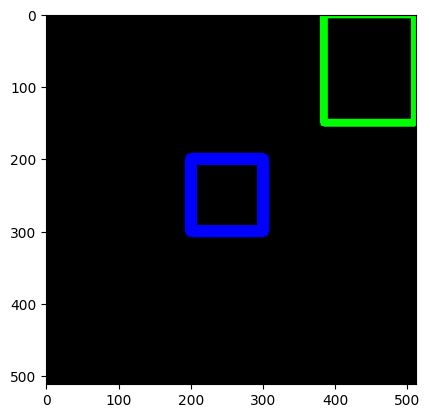

In [18]:
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

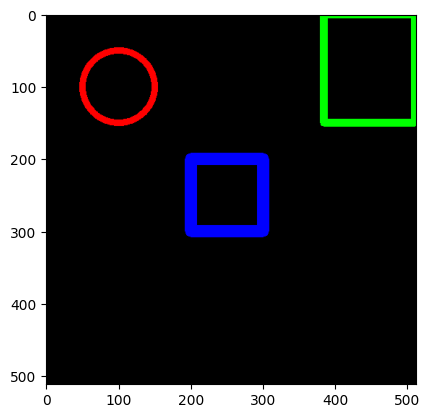

In [19]:
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

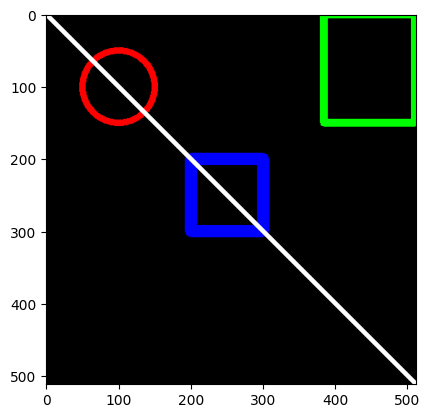

In [20]:
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

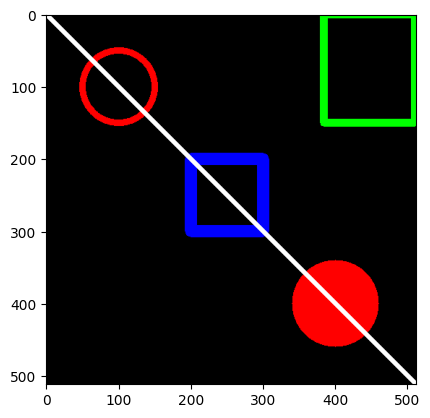

In [48]:
## Langkah 5
#Gambar hitam
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

#Gambar persegi panjang di sudut kanan atas (hijau)
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)

#Gambar persegi di tengah (biru)
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)

#Gambar lingkaran di sudut kiri atas (merah)
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)

#Gambar lingkaran yang terisi (merah)
cv.circle(black_img, center=(400, 400), radius=60, color=(255, 0, 0), thickness=-1)

#Gambar garis diagonal (putih) terakhir untuk memastikannya berada di atas
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)


#menampilkan hasil
plt.imshow(black_img)
plt.show()

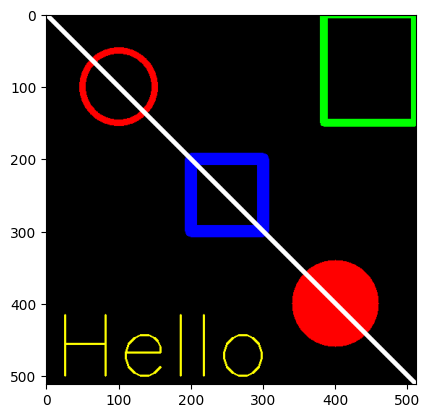

In [49]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img,text = 'Hello', org = (10, 500), fontFace = font, fontScale = 4, color = (255, 255, 0), thickness = 2, lineType = cv.LINE_AA)
plt.imshow(black_img)

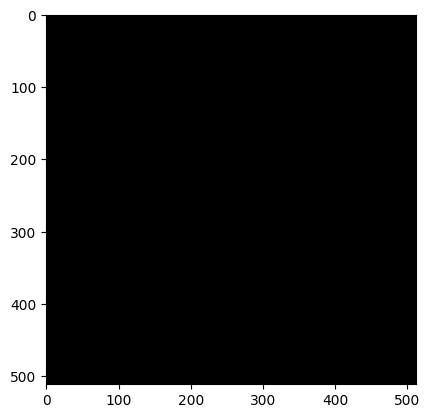

In [50]:
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_img2)

In [51]:
vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [52]:
pts = vertices.reshape((-1, 1, 2)) #nilai 2 untuk menunjukkan bahwa tiap ttik dibuat 3 channel yg mewakili R, G, dan B
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

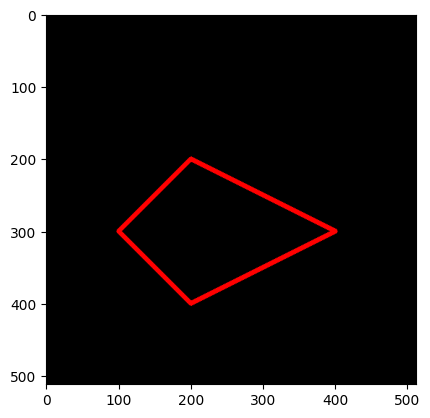

In [53]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img2)

# **Pertanyaan**
1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

**Jawab:**

- Tanpa matplotlib: biasanya ditampilkan dengan cv2.imshow() (OpenCV).
Citra akan muncul di jendela terpisah, menggunakan format warna BGR (Blue, Green, Red). Akibatnya, jika gambar sebenarnya berformat RGB, warnanya bisa terlihat tidak sesuai (misalnya merah jadi biru).

- Dengan matplotlib (plt.imshow()): gambar ditampilkan langsung di area notebook/jupyter/colab, dan matplotlib menggunakan format warna RGB. Karena itu tampilan warna lebih sesuai dengan gambar aslinya.

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?

**Jawab:**

- int16: setiap pixel dapat menyimpan nilai dari −32.768 sampai 32.767.
- int32: setiap pixel dapat menyimpan nilai dari −2.147.483.648 sampai 2.147.483.647.
- Pengaruhnya untuk gambar hitam (black image), hasil awalnya sama (semua pixel bernilai nol). Saat dilakukan operasi gambar (misalnya menggambar garis, persegi, atau menambah intensitas pixel), penggunaan tipe data yang berbeda memengaruhi:
- Batas maksimum/minimum nilai pixel (overflow/underflow).
- Konsumsi memori (int32 lebih besar butuh lebih banyak RAM).
- Proses komputasi bisa lebih lambat pada tipe data yang lebih besar.

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut:
from google.colab.patches import cv2_imshow
from skimage import io

**Jawab:**

- Fungsi cv2_imshow adalah versi pengganti cv2.imshow() khusus untuk Google Colab.
- Karena cv2.imshow() tidak bisa menampilkan jendela GUI di lingkungan Colab, cv2_imshow digunakan agar gambar bisa langsung ditampilkan di output notebook.

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

**Jawab:**

io dari scikit-image (skimage) berfungsi untuk membaca (read) dan menulis (write) file citra. skimage.io lebih fleksibel dalam menangani berbagai format gambar dibanding hanya cv2.imread().

# **TUGAS**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

**Jawab:**

- figsize adalah parameter pada matplotlib (plt.figure(figsize=(w,h))) yang hanya mengubah ukuran tampilan gambar di layar/output notebook, bukan jumlah pixel asli gambar.
- Ukuran pixel citra (shape array NumPy) tetap sama, karena figsize hanya mengatur skala visualisasi.

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!


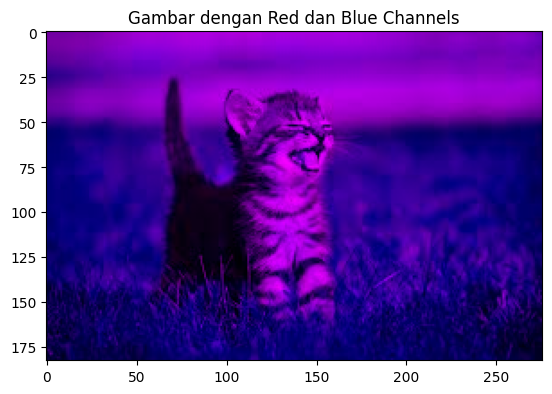

In [56]:
#Menampilkan gambar hanya dengan saluran Merah dan Biru
img_rb = img3.copy()
img_rb[:, :, 1] = 0  # Atur saluran Hijau ke 0

plt.imshow(img_rb)
plt.title("Gambar dengan Red dan Blue Channels")
plt.show()

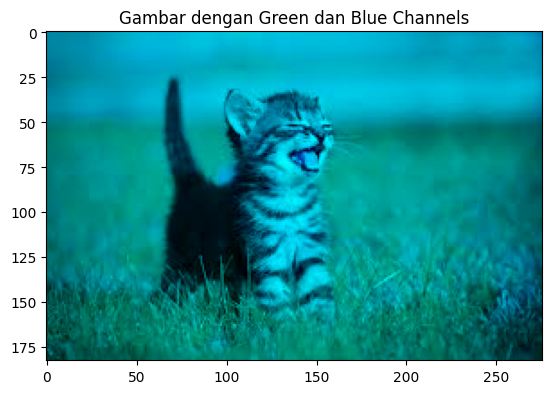

In [57]:
#Menampilkan gambar dengan hanya saluran Hijau dan Biru
img_gb = img3.copy()
img_gb[:, :, 0] = 0  # Atur saluran Merah ke 0

plt.imshow(img_gb)
plt.title("Gambar dengan Green dan Blue Channels")
plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120!

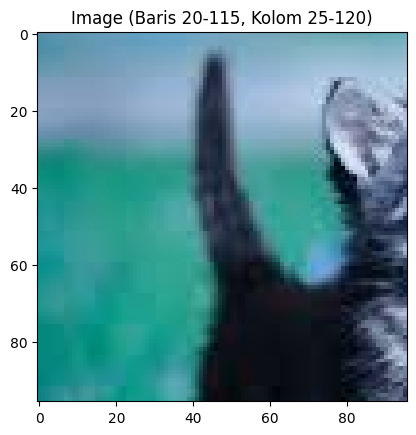

In [58]:
#Menampilkan wilayah gambar dari baris 20 hingga 115 dan kolom 25 hingga 120
image_region = img3[20:116, 25:121]
plt.imshow(image_region)
plt.title("Image (Baris 20-115, Kolom 25-120)")
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

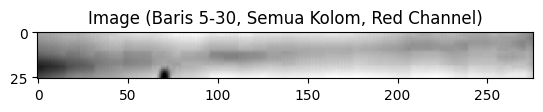

In [59]:
#Menampilkan baris gambar 5-30, semua kolom, hanya saluran Merah
image_red_channel = img3[5:31, :, 0]

plt.imshow(image_red_channel, cmap='gray')
plt.title("Image (Baris 5-30, Semua Kolom, Red Channel)")
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

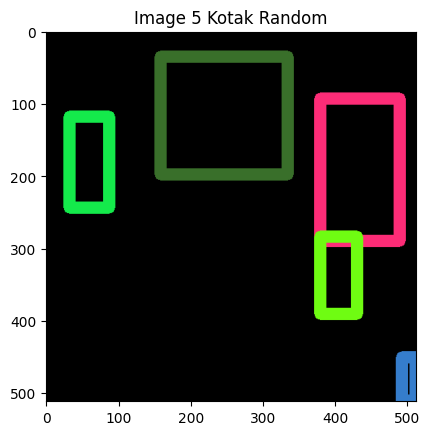

In [62]:
## Langkah 5 lanjutan - Membuat 5 kotak acak
# Membuat gambar hitam
random_rect_img = np.zeros(shape=(512, 512, 3), dtype=np.uint8)

# Jumlah persegi panjang yang akan digambar
num_rectangles = 5

for _ in range(num_rectangles):
    # koordinat acak untuk sudut kiri atas
    x1 = np.random.randint(0, 512)
    y1 = np.random.randint(0, 512)

    # lebar dan tinggi acak (pastikan berada dalam batas gambar)
    width = np.random.randint(10, 200)
    height = np.random.randint(10, 200)
    x2 = min(x1 + width, 511)
    y2 = min(y1 + height, 511)

    # warna acak (format BGR)
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))

    # ketebalan acak (-1 untuk terisi, positif untuk garis luar)
    thickness = np.random.randint(-1, 10)

    # Gambar persegi panjang
    cv.rectangle(random_rect_img, pt1=(x1, y1), pt2=(x2, y2), color=color, thickness=15)

#menampilkan gambar
plt.imshow(cv.cvtColor(random_rect_img, cv.COLOR_BGR2RGB))
plt.title("Image 5 Kotak Random")
plt.show()

6. Tampilkan image dengan posisi terbalik!

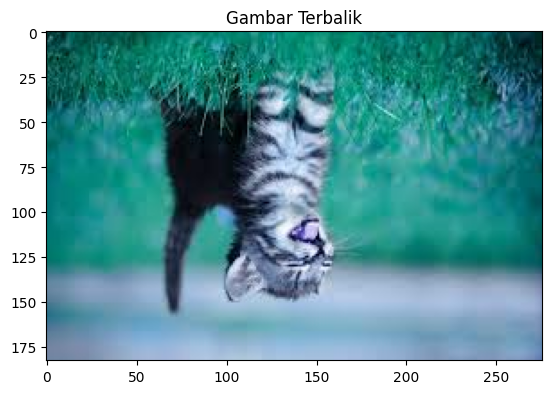

In [64]:
# Membalikkan gambar secara vertikal (terbalik)
img_flipped = cv.flip(img3, 0)

plt.imshow(img_flipped)
plt.title("Gambar Terbalik")
plt.show()

7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).

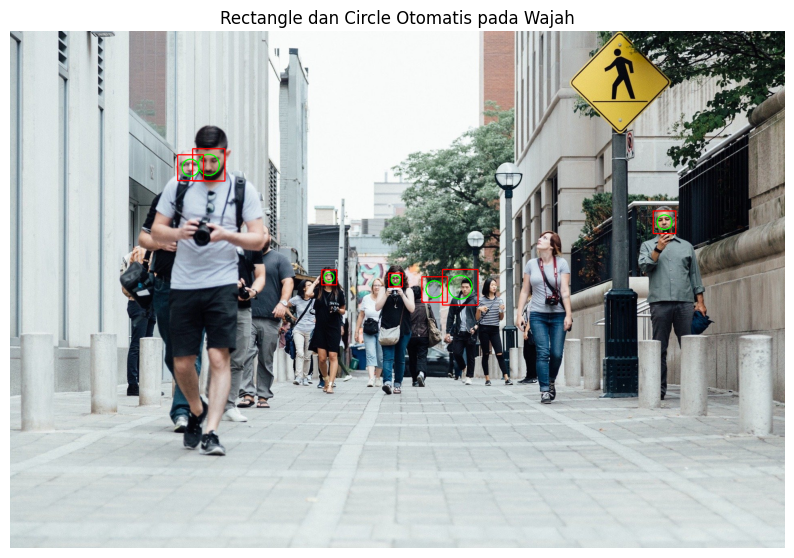

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Image PCVK/pejalan-kaki.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Load Haar Cascade untuk deteksi wajah
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))

# Gambar kotak & lingkaran di setiap wajah
for (x, y, w, h) in faces:
    # Kotak merah
    cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Lingkaran hijau di tengah wajah
    center = (x + w//2, y + h//2)
    radius = w//3
    cv.circle(img_rgb, center, radius, (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title("Rectangle dan Circle Otomatis pada Wajah")
plt.axis("off")
plt.show()

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!  

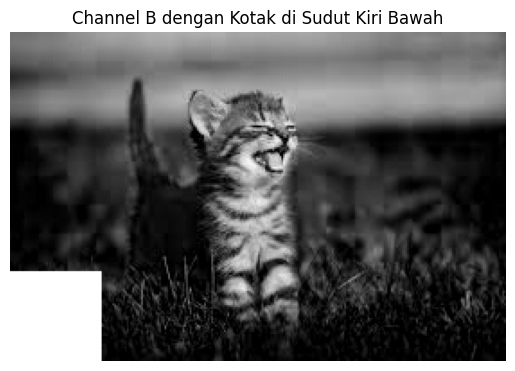

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt

# Pastikan img dan img3 sudah terdefinisi
img = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg')
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil channel Biru dari citra
img_biru = img3[:, :, 2]

# Buat salinan untuk digambar
img_biru_dengan_kotak = img_biru.copy()

# Ambil dimensi citra
tinggi, lebar = img_biru_dengan_kotak.shape

# Tentukan koordinat untuk kotak di sudut kiri bawah
lebar_kotak = 50
tinggi_kotak = 50
pt1 = (0, tinggi - tinggi_kotak)   # titik kiri bawah
pt2 = (lebar_kotak, tinggi)        # titik kanan bawah

# Gambar kotak pada channel Biru.
# Karena channel tunggal, warna hanya 0–255 (intensitas abu-abu).
# Agar terlihat jelas, gunakan warna putih (255).
cv.rectangle(img_biru_dengan_kotak, pt1, pt2, color=255, thickness=-1)  # -1 artinya kotak diisi penuh

# Tampilkan channel Biru dengan kotak
plt.imshow(img_biru_dengan_kotak, cmap='gray')
plt.title("Channel B dengan Kotak di Sudut Kiri Bawah")
plt.axis("off")
plt.show()

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran
font, dan warna font yang sesuai keinginan anda.

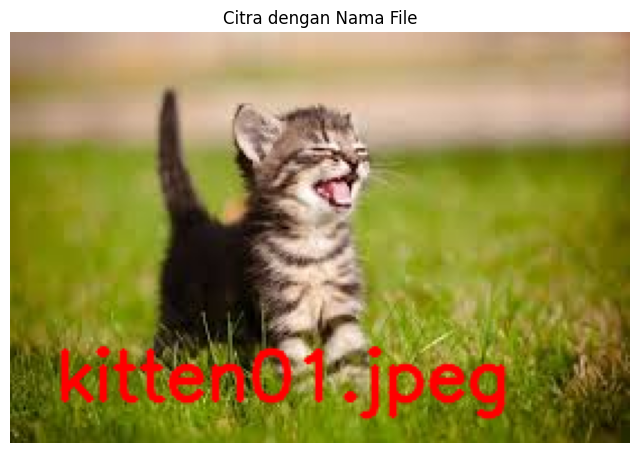

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca citra
img = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Tambahkan tulisan nama file
nama_file = "kitten01.jpeg"

# Koordinat awal teks (x,y) -> posisikan di bawah gambar
posisi_teks = (20, img_rgb.shape[0] - 20)  # 20 pixel dari kiri, 20 pixel dari bawah

# Pilih font
font = cv.FONT_HERSHEY_SIMPLEX

# Tambahkan teks ke citra
cv.putText(img_rgb, nama_file, posisi_teks, font,
           fontScale=1, color=(255, 0, 0), thickness=2, lineType=cv.LINE_AA)

# Tampilkan hasil
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Citra dengan Nama File")
plt.axis("off")
plt.show()